<a href="https://colab.research.google.com/github/Viswanathan25/Singapore-Resale-Flat-Prices-Prediction/blob/main/S_preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Objective**
The project aims to create a user-friendly web application using machine learning. It predicts resale prices of flats in Singapore based on historical data, aiding potential buyers and sellers in estimating a flat's resale value

In [ ]:
#Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as snb
from sklearn import preprocessing

In [ ]:
#Collecting the datasets
df1 = pd.read_csv("/content/drive/MyDrive/Singapore datasets/singapore land sales/ResaleFlatPricesBasedonApprovalDate19901999.csv")
df2 = pd.read_csv("/content/drive/MyDrive/Singapore datasets/singapore land sales/ResaleFlatPricesBasedonApprovalDate2000Feb2012.csv")
df3 = pd.read_csv("/content/drive/MyDrive/Singapore datasets/singapore land sales/ResaleFlatPricesBasedonRegistrationDateFromMar2012toDec2014.csv")
df4 = pd.read_csv("/content/drive/MyDrive/Singapore datasets/singapore land sales/ResaleFlatPricesBasedonRegistrationDateFromJan2015toDec2016.csv")
df5 = pd.read_csv("/content/drive/MyDrive/Singapore datasets/singapore land sales/ResaleflatpricesbasedonregistrationdatefromJan2017 to 2024.csv")

#**Preprocessing**

In [ ]:
#checking the data shapes
df = [df1,df2,df3,df4,df5]
for i in df:
  print(i.shape)

(287196, 10)
(369651, 10)
(52203, 10)
(37153, 11)
(175359, 11)


***Merging the 5 Dataframes***

In [ ]:
#concating the all data frames into a single data frame
df = pd.concat([df1,df2,df3,df4,df5],ignore_index=True)

***Displaying the dataFrames***

In [ ]:
#Viewing head data
df.head(10)

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease
0,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000.0,NaN
1,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000.0,NaN
2,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,8000.0,NaN
3,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,IMPROVED,1977,6000.0,NaN
4,1990-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,NEW GENERATION,1976,47200.0,NaN
5,1990-01,ANG MO KIO,3 ROOM,211,ANG MO KIO AVE 3,01 TO 03,67.0,NEW GENERATION,1977,46000.0,NaN
6,1990-01,ANG MO KIO,3 ROOM,202,ANG MO KIO AVE 3,07 TO 09,67.0,NEW GENERATION,1977,42000.0,NaN
7,1990-01,ANG MO KIO,3 ROOM,235,ANG MO KIO AVE 3,10 TO 12,67.0,NEW GENERATION,1977,38000.0,NaN
8,1990-01,ANG MO KIO,3 ROOM,235,ANG MO KIO AVE 3,04 TO 06,67.0,NEW GENERATION,1977,40000.0,NaN
9,1990-01,ANG MO KIO,3 ROOM,232,ANG MO KIO AVE 3,01 TO 03,67.0,NEW GENERATION,1977,47000.0,NaN


In [ ]:
#Displaying tail data
df.tail(10)

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease
921552,2024-03,YISHUN,5 ROOM,512C,YISHUN ST 51,07 TO 09,113.0,Improved,2017,728000.0,92 years 06 months
921553,2024-03,YISHUN,5 ROOM,637,YISHUN ST 61,10 TO 12,121.0,Improved,1987,680000.0,62 years 08 months
921554,2024-03,YISHUN,5 ROOM,607,YISHUN ST 61,01 TO 03,121.0,Improved,1987,613000.0,62 years 07 months
921555,2024-03,YISHUN,5 ROOM,841,YISHUN ST 81,07 TO 09,122.0,Improved,1988,745000.0,62 years 11 months
921556,2024-03,YISHUN,EXECUTIVE,344,YISHUN AVE 11,01 TO 03,145.0,Maisonette,1988,820000.0,63 years 05 months
921557,2024-03,YISHUN,EXECUTIVE,791,YISHUN AVE 2,10 TO 12,146.0,Apartment,1987,851888.0,62 years 07 months
921558,2024-03,YISHUN,EXECUTIVE,392,YISHUN AVE 6,07 TO 09,146.0,Maisonette,1988,830000.0,63 years 04 months
921559,2024-03,YISHUN,EXECUTIVE,326,YISHUN RING RD,10 TO 12,146.0,Maisonette,1988,820000.0,63 years 05 months
921560,2024-03,YISHUN,EXECUTIVE,360,YISHUN RING RD,04 TO 06,146.0,Maisonette,1988,860000.0,63 years 05 months
921561,2024-03,YISHUN,EXECUTIVE,606,YISHUN ST 61,07 TO 09,142.0,Apartment,1987,780000.0,62 years 10 months


In [ ]:
#Checking data shape and info
df.shape

(921562, 11)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 921562 entries, 0 to 921561
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   month                921562 non-null  object 
 1   town                 921562 non-null  object 
 2   flat_type            921562 non-null  object 
 3   block                921562 non-null  object 
 4   street_name          921562 non-null  object 
 5   storey_range         921562 non-null  object 
 6   floor_area_sqm       921562 non-null  float64
 7   flat_model           921562 non-null  object 
 8   lease_commence_date  921562 non-null  int64  
 9   resale_price         921562 non-null  float64
 10  remaining_lease      212512 non-null  object 
dtypes: float64(2), int64(1), object(8)
memory usage: 77.3+ MB


***Checking missing values***

In [ ]:
#displaying Null values
df.isnull().sum()

month                       0
town                        0
flat_type                   0
block                       0
street_name                 0
storey_range                0
floor_area_sqm              0
flat_model                  0
lease_commence_date         0
resale_price                0
remaining_lease        709050
dtype: int64

*After checking the correlation, it has been determined that the "remaining lease" column does not have a significant impact. Therefore, it will be dropping from the dataset*

In [ ]:
#Droping the column
df = df.drop(columns ='remaining_lease')
df

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price
0,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000.0
1,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000.0
2,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,8000.0
3,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,IMPROVED,1977,6000.0
4,1990-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,NEW GENERATION,1976,47200.0
...,...,...,...,...,...,...,...,...,...,...
921557,2024-03,YISHUN,EXECUTIVE,791,YISHUN AVE 2,10 TO 12,146.0,Apartment,1987,851888.0
921558,2024-03,YISHUN,EXECUTIVE,392,YISHUN AVE 6,07 TO 09,146.0,Maisonette,1988,830000.0
921559,2024-03,YISHUN,EXECUTIVE,326,YISHUN RING RD,10 TO 12,146.0,Maisonette,1988,820000.0
921560,2024-03,YISHUN,EXECUTIVE,360,YISHUN RING RD,04 TO 06,146.0,Maisonette,1988,860000.0


*Visualize the distribution of the resale price column*

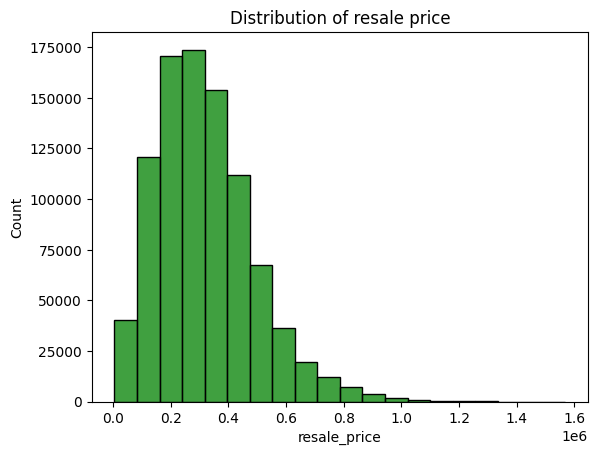

In [ ]:
#Distribution of resale
snb.histplot(df['resale_price'], bins = 20, color='Green')
plt.title('Distribution of resale price')
plt.show()

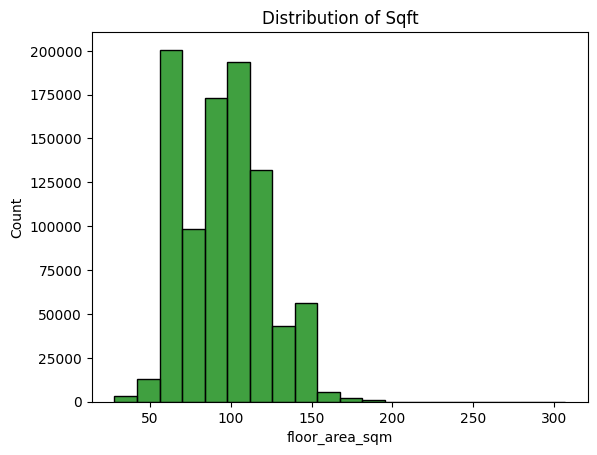

In [ ]:
#Distribution of floor area
snb.histplot(df['floor_area_sqm'], bins = 20, color='Green')
plt.title('Distribution of Sqft')
plt.show()

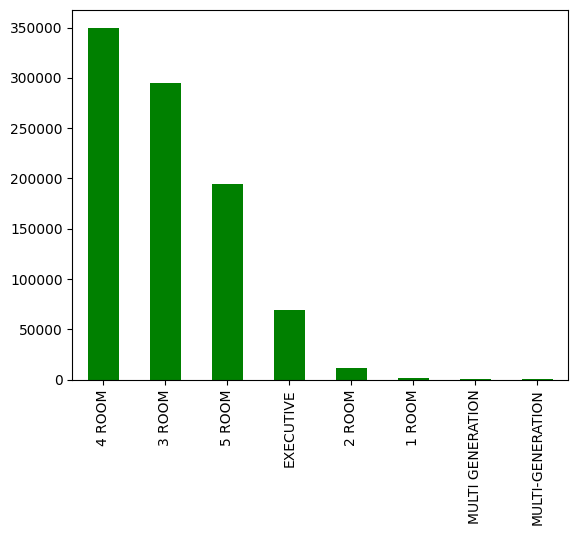

In [ ]:
#Distribution of flat
df['flat_type'].value_counts().plot(kind = 'bar',color='Green')
plt.show()

## **Dealing with Features**

In [ ]:
#Flat type
df['flat_type'].value_counts()

4 ROOM              349973
3 ROOM              294589
5 ROOM              194160
EXECUTIVE            69326
2 ROOM               11671
1 ROOM                1301
MULTI GENERATION       279
MULTI-GENERATION       263
Name: flat_type, dtype: int64

In [ ]:
# Unique lables in flat_type column
df['flat_type'].unique()

array(['1 ROOM', '3 ROOM', '4 ROOM', '5 ROOM', '2 ROOM', 'EXECUTIVE',
       'MULTI GENERATION', 'MULTI-GENERATION'], dtype=object)

*Encoding the flat type*

In [ ]:
# Assigning the value-pairs to be replaced
cat = {'1 ROOM': 1,
       '2 ROOM':2,
       '3 ROOM':3,
       '4 ROOM':4,
       '5 ROOM':5,
       'EXECUTIVE':6,
       'MULTI GENERATION':7}

# Replacing the values in df
df['flat_type'] = df['flat_type'].replace(cat)
df['flat_type'].value_counts()

4                   349973
3                   294589
5                   194160
6                    69326
2                    11671
1                     1301
7                      279
MULTI-GENERATION       263
Name: flat_type, dtype: int64

In [ ]:
# Collapsing the flat_type categories
mapping={'MULTI-GENERATION':'MULTI GENERATION'}

df['flat_type'] = df['flat_type'].replace(mapping)
df['flat_type'].unique()

array([1, 3, 4, 5, 2, 6, 7, 'MULTI GENERATION'], dtype=object)

*Dealing with flat type*

In [ ]:
# Flat_model column
print(df['flat_model'].nunique())
df['flat_model'].unique()

34


array(['IMPROVED', 'NEW GENERATION', 'MODEL A', 'STANDARD', 'SIMPLIFIED',
       'MODEL A-MAISONETTE', 'APARTMENT', 'MAISONETTE', 'TERRACE',
       '2-ROOM', 'IMPROVED-MAISONETTE', 'MULTI GENERATION',
       'PREMIUM APARTMENT', 'Improved', 'New Generation', 'Model A',
       'Standard', 'Apartment', 'Simplified', 'Model A-Maisonette',
       'Maisonette', 'Multi Generation', 'Adjoined flat',
       'Premium Apartment', 'Terrace', 'Improved-Maisonette',
       'Premium Maisonette', '2-room', 'Model A2', 'DBSS', 'Type S1',
       'Type S2', 'Premium Apartment Loft', '3Gen'], dtype=object)

In [ ]:
#changing into small letters
df['flat_model'] = df['flat_model'].str.lower()

In [ ]:
#flat_model value counts
df['flat_model'].value_counts()

model a                   262901
improved                  240494
new generation            188341
simplified                 57345
premium apartment          46246
standard                   42408
apartment                  35302
maisonette                 29538
model a2                   10084
dbss                        3247
model a-maisonette          2067
adjoined flat               1242
terrace                      690
multi generation             542
type s1                      432
type s2                      215
improved-maisonette          125
2-room                       122
premium apartment loft       107
premium maisonette            86
3gen                          28
Name: flat_model, dtype: int64

*Encoding the flat model*

In [ ]:
ecode= preprocessing.LabelEncoder()

flat_modelcode= ecode.fit_transform(df['flat_model'])
df.insert(loc = 8,
          column = 'flat_modelcode',
          value = flat_modelcode)
df['flat_modelcode'].value_counts()

8     262901
5     240494
12    188341
16     57345
13     46246
17     42408
3      35302
7      29538
10     10084
4       3247
9       2067
2       1242
18       690
11       542
19       432
20       215
6        125
0        122
14       107
15        86
1         28
Name: flat_modelcode, dtype: int64

*Town column*

In [ ]:
# Town column
df['town'].nunique()

27

In [ ]:
#checking value counts
df['town'].value_counts()

TAMPINES           79556
YISHUN             69695
BEDOK              66366
JURONG WEST        66303
WOODLANDS          65145
ANG MO KIO         51875
HOUGANG            50448
BUKIT BATOK        44045
CHOA CHU KANG      38042
BUKIT MERAH        34142
PASIR RIS          33086
SENGKANG           32093
TOA PAYOH          31387
QUEENSTOWN         28640
GEYLANG            28059
CLEMENTI           27928
BUKIT PANJANG      27532
KALLANG/WHAMPOA    27000
JURONG EAST        24660
SERANGOON          22736
BISHAN             21189
PUNGGOL            20267
SEMBAWANG          13675
MARINE PARADE       8010
CENTRAL AREA        7111
BUKIT TIMAH         2508
LIM CHU KANG          64
Name: town, dtype: int64

In [ ]:
# Creating a column with encoded value
town = ecode.fit_transform(df['town'])
df.insert(loc = 2,
          column = 'town_code',
          value = town)

In [ ]:
# Encoded value count
df['town_code'].value_counts()

23    79556
26    69695
1     66366
13    66303
25    65145
0     51875
11    50448
3     44045
8     38042
4     34142
17    33086
21    32093
24    31387
19    28640
10    28059
9     27928
5     27532
14    27000
12    24660
22    22736
2     21189
18    20267
20    13675
16     8010
7      7111
6      2508
15       64
Name: town_code, dtype: int64

*Spliting the columns*

In [ ]:
# Print header of column
df['storey_range'].head()

0    10 TO 12
1    04 TO 06
2    10 TO 12
3    07 TO 09
4    04 TO 06
Name: storey_range, dtype: object

In [ ]:
# Splitting storey range column
storey=df['storey_range'].str.split(' TO ',expand = True)
storey.head()

,0,1
0,10,12
1,04,06
2,10,12
3,07,09
4,04,06


In [ ]:
# Creating the storey minimum values as column
df.insert(loc = 6,
          column = 'storey_min',
          value = storey[0])
# Creating the storey maximum values as column
df.insert(loc = 7,
          column = 'storey_max',
          value = storey[1])

In [ ]:
#Spliting the month columns
month=df['month'].str.split('-',expand = True)
month.head()

,0,1
0,1990,01
1,1990,01
2,1990,01
3,1990,01
4,1990,01


In [ ]:
# Creating the year values as column
df.insert(loc = 1,
          column = 'selling_year',
          value = month[0])
# Creating the storey maximum values as column
df.insert(loc = 2,
          column = 'selling_month',
          value = month[1])

In [ ]:
df = df[['selling_month', 'selling_year','town', 'town_code',	'flat_type',	'block',	'street_name',	'storey_min',
         'storey_max',	'storey_range',	'floor_area_sqm',	'flat_model',	'flat_modelcode',
         'lease_commence_date',	'resale_price' ]]

In [ ]:
df.head()

,selling_month,selling_year,town,town_code,flat_type,block,street_name,storey_min,storey_max,storey_range,floor_area_sqm,flat_model,flat_modelcode,lease_commence_date,resale_price
0,01,1990,ang mo kio,0,1,309,ANG MO KIO AVE 1,10,12,10 TO 12,31.0,improved,5,1977,9000.0
1,01,1990,ang mo kio,0,1,309,ANG MO KIO AVE 1,04,06,04 TO 06,31.0,improved,5,1977,6000.0
2,01,1990,ang mo kio,0,1,309,ANG MO KIO AVE 1,10,12,10 TO 12,31.0,improved,5,1977,8000.0
3,01,1990,ang mo kio,0,1,309,ANG MO KIO AVE 1,07,09,07 TO 09,31.0,improved,5,1977,6000.0
4,01,1990,ang mo kio,0,3,216,ANG MO KIO AVE 1,04,06,04 TO 06,73.0,new generation,12,1976,47200.0


###*Checking Datatypes*

In [ ]:
df.dtypes

selling_month           object
selling_year            object
town                    object
town_code                int64
flat_type               object
block                   object
street_name             object
storey_min              object
storey_max              object
storey_range            object
floor_area_sqm         float64
flat_model              object
flat_modelcode           int64
lease_commence_date      int64
resale_price           float64
dtype: object

In [ ]:
#changing some dtype to numeric data
df['selling_month'] = df['selling_month'].astype(int)
df['selling_year'] = df['selling_year'].astype(int)
df['storey_min'] = df['storey_min'].astype(int)
df['storey_max'] = df['storey_max'].astype(int)

In [ ]:
df.dtypes

selling_month            int64
selling_year             int64
town                    object
town_code                int64
flat_type                int64
block                   object
street_name             object
storey_min               int64
storey_max               int64
storey_range            object
floor_area_sqm         float64
flat_model              object
flat_modelcode           int64
lease_commence_date      int64
resale_price           float64
selling_month            int64
dtype: object

### **Correlation Check**

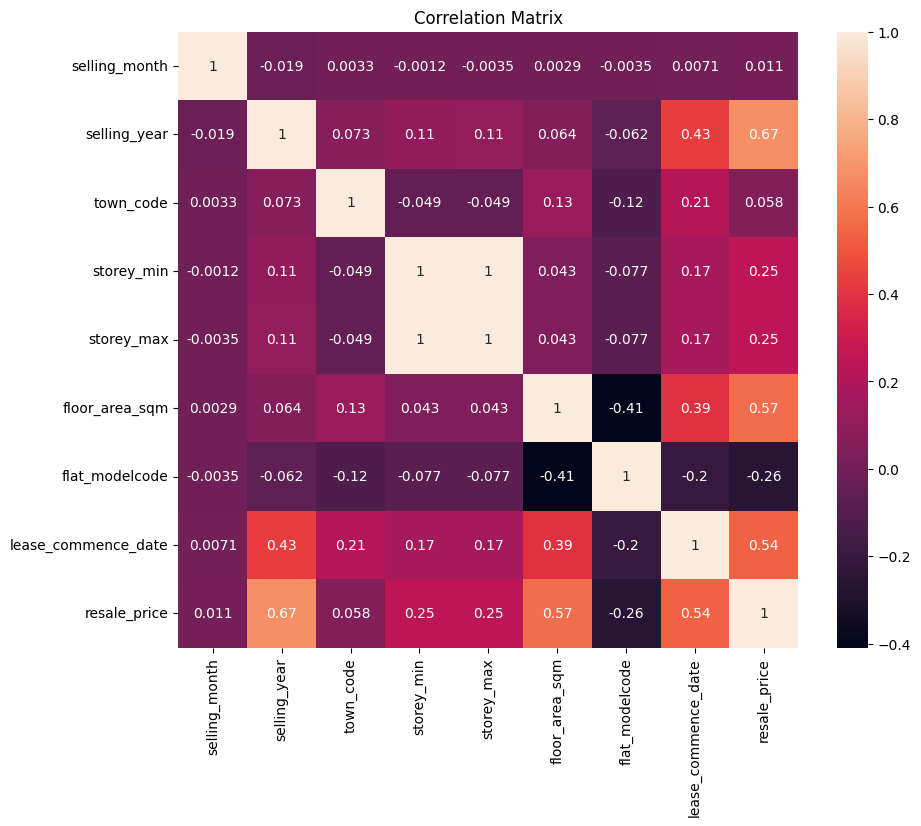

In [ ]:
corr_df = df[['selling_month', 'selling_year', 'town_code', 'storey_min', 'storey_max',
              'floor_area_sqm', 'flat_modelcode', 'lease_commence_date', 'resale_price']].dropna().corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
snb.heatmap(corr_df,annot=True)
plt.title("Correlation Matrix")
plt.show()

In [ ]:
#downloading cleaned datasets
df.to_csv('final.csv',index=False)